In [84]:
# Author: Chiang Qing Rong
# Date: 4/6/2020

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
# dataset from kaggle
df = pd.read_csv('../Mall_Customers.csv') 

# Spending Score is something you assign to the customer based on your
# defined parameters like customer behavior and purchasing data.

In [62]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
from sklearn.cluster import KMeans 

In [64]:
#applying method as we need to convert gender to numeric for kmeans clustering.

def method1(gender):
    if gender == "Male":
        return 1
    elif gender == "Female":
        return 0 


df['Gender_Converted'] = df['Gender'].apply(method1)

In [65]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Converted
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [66]:
clusters5 = KMeans(n_clusters = 5) #selecting the number of clusters that we want to model
selected_df = df.iloc[:,2:5] # selecting the data to be fitted into the model (we do not include column index 0 and 1 because its not relevant)
clusters5.fit(selected_df) # finally, fit the dataset into the model!


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
#Gives you the centroid of cluster centers for the 5 clusters you have just created!
clusters5.cluster_centers_ 

array([[25.52173913, 26.30434783, 78.56521739],
       [40.66666667, 87.75      , 17.58333333],
       [43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348]])

In [68]:
#label for each observation, returns a list
clusters5.labels_

# Adding the lables to the dataset
df['cluster'] = clusters5.labels_

In [69]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Converted,cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,4


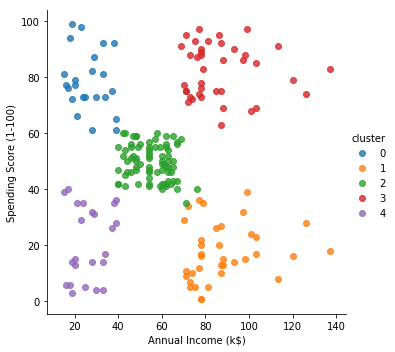

In [70]:
#time to visualize it!
sns.lmplot( x="Annual Income (k$)", y="Spending Score (1-100)", data=df, fit_reg= False, hue='cluster', legend=True)

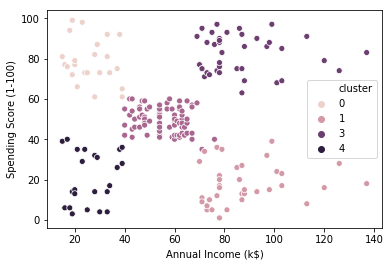

In [71]:
#another way to visualize it!
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)" ,data = df, legend = 'brief' , sizes = (20, 500), hue ='cluster')

In [72]:
#now we can group them by clusters and get their average/mean for each of the following category
clus_mean = df.groupby(['cluster'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

In [73]:
#With the following data, we can understand customers better and use different marketing technique to target them.
clus_mean

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,25.521739,26.304348,78.565217
1,40.666667,87.750000,17.583333
2,43.088608,55.291139,49.569620
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


In [82]:
# We can see how many male and females are there in each category as well!
df.groupby(['cluster'])['Gender_Converted'].value_counts()

cluster  Gender_Converted
0        0                   14
         1                    9
1        1                   19
         0                   17
2        0                   46
         1                   33
3        0                   21
         1                   18
4        0                   14
         1                    9
Name: Gender_Converted, dtype: int64